<h2> Problem Statement </h2>
<span >  Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. </span>


<h2>Importing Libraries</h2>

In [126]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [127]:
# Import Libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm


<h2 style="color:blue">Read CSV </h2>

In [128]:
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


<h2 style="color:blue">Data Cleaning and Preperation</h2>

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<div class="alert alert-block alert-success">
    <b>Observation :</b> From Dataframe,Looks like there are quite a few categorical variables (object) present in given dataset.for categorical variable,we will need to create dummy variables.
    <br>we can see many null values present dataset, so we will need to treat them.</b>
</div>

In [130]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [131]:
# Shape of the dataframe
df.shape

(9240, 37)

<h2 style="color:Blue"> Missing values Treatment </h2>

In [132]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [133]:
print((df.isnull().sum()/len(df))*100)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

<span style ='color: blue'>First we will replace <b>select</b> value as null value in dataframe. 
<br>Then based upon our need we can later impute each columns to some meaningfull value like mean, median etc. </span>

In [134]:
df = df.replace('Select', np.nan)
round(df.isnull().sum()/(len(df))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

<span style ='color:blue'>Drop <b style='color:red'> columns </b>which are having null values more than 70%. </span>

In [135]:
  
df = df.drop(columns =['How did you hear about X Education','Lead Profile'])

<span style = 'color:Blue'>Drop <b style='color:red'> Rows</b> with very low perecntage of null values for specific coloumn. </span>

In [136]:
df = df.dropna(subset =['Lead Source','Last Activity'])
df = df[~np.isnan(df['TotalVisits'])]
df = df[~np.isnan(df['Page Views Per Visit'])]
df.shape

(9074, 35)

In [137]:
round(df.isnull().sum()/(len(df))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          25.30
Specialization                                   36.17
What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

<span style='color:blue'> Now let's see next column having highest NULL values i.e. Lead Quality :52.02%</b>
</span>


Might be             1519
Not Sure             1086
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64


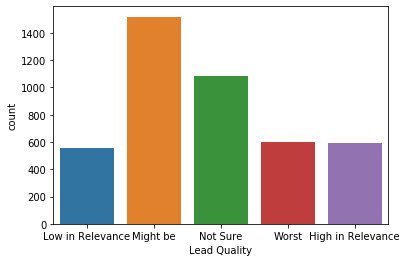

In [138]:
print(df['Lead Quality'].astype('category').value_counts())
sns.countplot(df['Lead Quality'])

<span style = 'color:blue'> Similarly columns with 45% </span>

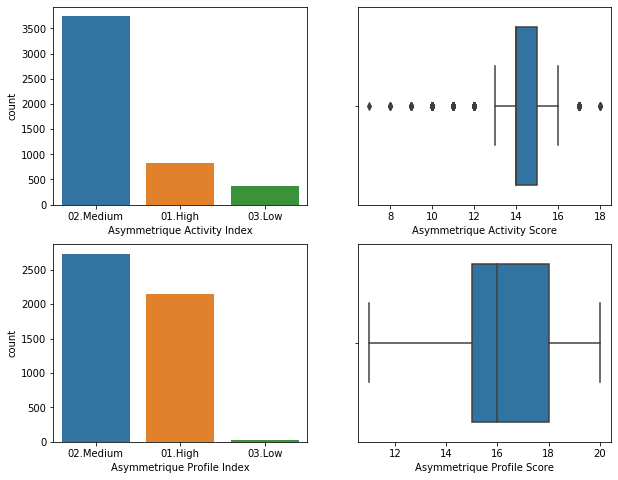

In [139]:

fig,axs = plt.subplots(2,2, figsize = (10,8))
plt1 = sns.countplot(df['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(df['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(df['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(df['Asymmetrique Profile Score'], ax = axs[1,1])

<div class="alert alert-block alert-success">
    <b>Observation :</b>we can drop above coloums as percentage of  missing values is high</b>
</div>

In [140]:
df = df.drop(columns =['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score',
                       'Asymmetrique Profile Index','Lead Quality'])
df.shape

(9074, 30)

<span style ='color:blue'> Let's see country and city column </span>

In [141]:
df['Country'].astype('category').value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Kuwait                     4
Sweden                     3
Belgium                    2
Bangladesh                 2
China                      2
Ghana                      2
Asia/Pacific Region        2
Italy                      2
Netherlands                2
Philippines                2
Uganda                     2
Indonesia                  1
Kenya                      1
Liberia                    1
Vietnam                    1
Denmark                    1
Russia                     1
Sri Lanka     

In [142]:
df['City'].astype('category').value_counts()

Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

<span style = 'color: blue'> we can drop City and Country as percentage missing values are high and it is highly dense to one value like india and mumbai.</span>

In [143]:
df = df.drop(columns =['Country','City'])
df.shape

(9074, 28)

In [144]:
round(df.isnull().sum()/(len(df))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                   36.17
What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Media and Advertising                202
Travel and Tourism                   202
International Business               176
Healthcare Management                156
Hospitality Management               111
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

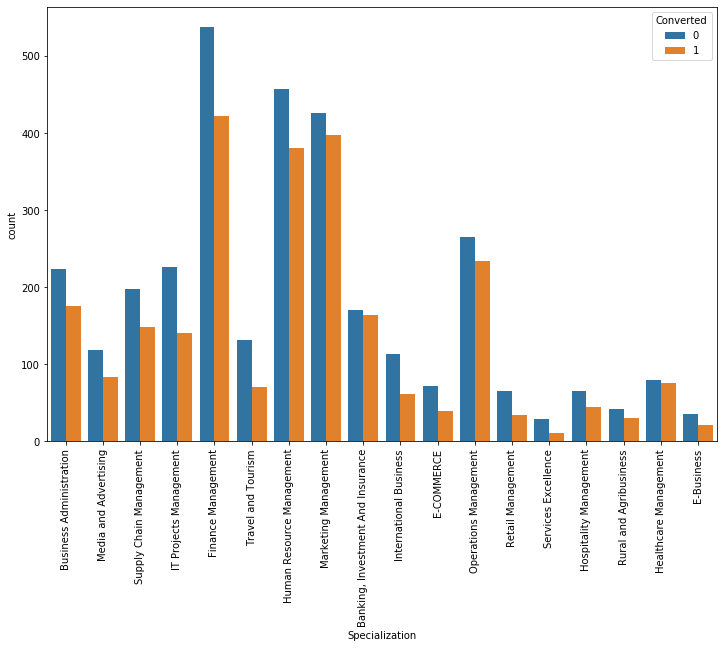

In [145]:
## Specialization
from matplotlib.pyplot import xticks
print(df['Specialization'].astype('category').value_counts())
fig, axs = plt.subplots(figsize = (12,8))
sns.countplot(x= 'Specialization', hue = "Converted", data = df)
xticks(rotation = 90)

<span style = 'color:blue'>let's impute the specilization column we will replace missing value as OthersSpecialization </span>

In [146]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'OtherSpecialization')

OtherSpecialization                  3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

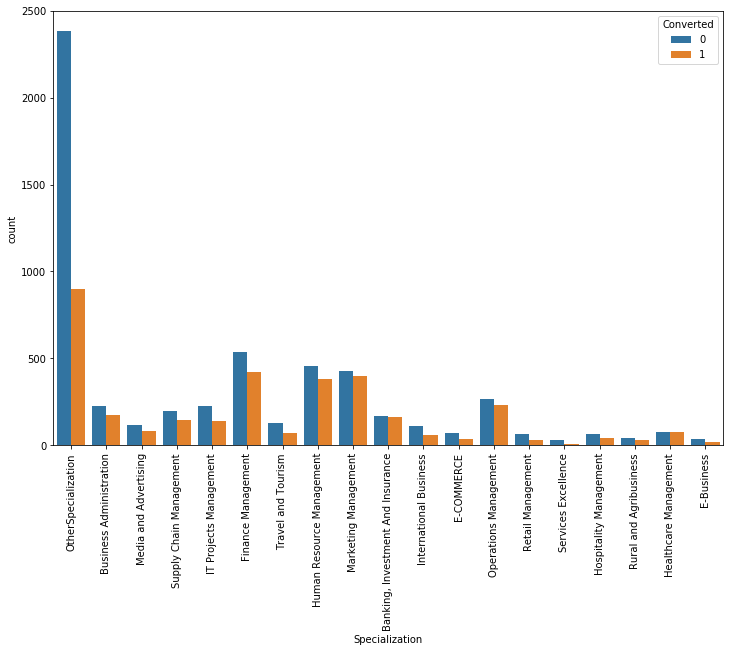

In [147]:
print(df['Specialization'].astype('category').value_counts())
fig, axs = plt.subplots(figsize = (12,8))
sns.countplot(x= 'Specialization', hue = "Converted", data = df)
xticks(rotation = 90)

<span style ='color:Blue'>column : What is your current occupation </span>

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

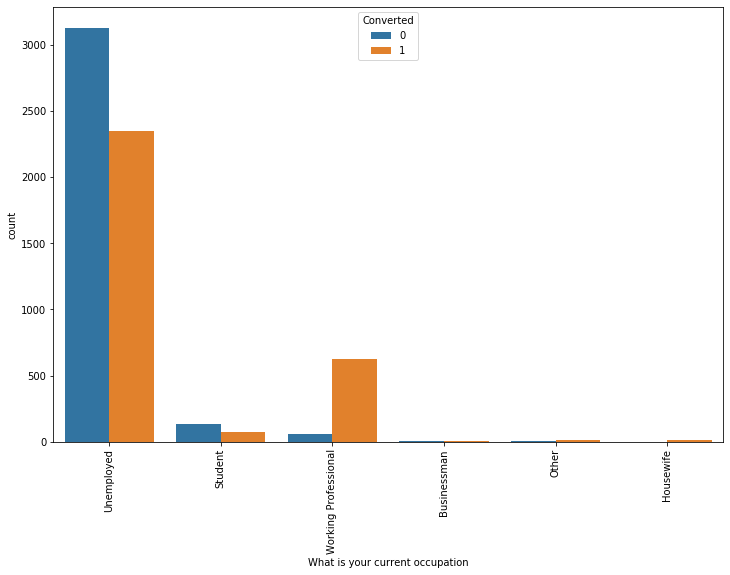

In [148]:
print(df['What is your current occupation'].astype('category').value_counts())
fig, axs = plt.subplots(figsize = (12,8))
sns.countplot(x= 'What is your current occupation', hue = "Converted", data = df)
xticks(rotation = 90)

<span style = 'color:blue'>column What is your current occupation- Impute Values 'other' and NAN  to OthersOccupation  </span>

Unemployed              5476
OtherOccupation         2698
Working Professional     677
Student                  206
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

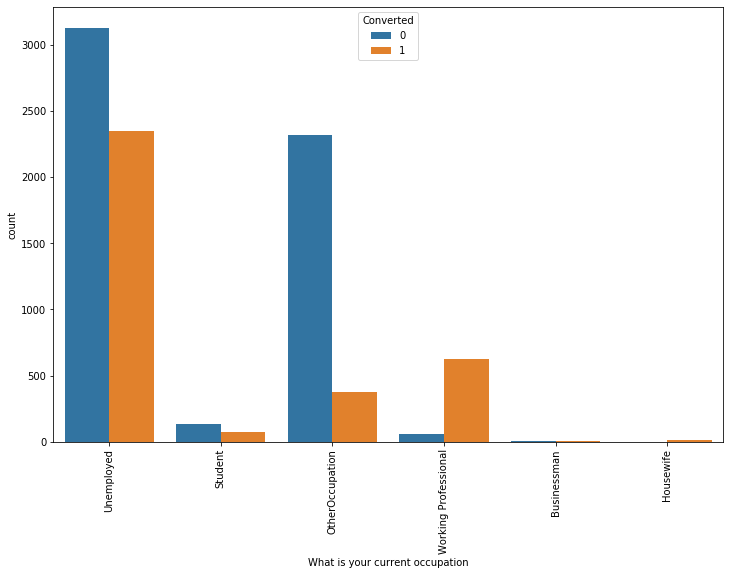

In [149]:

df['What is your current occupation'] = df['What is your current occupation'].replace(['Other'], 'OtherOccupation')
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'OtherOccupation')
print(df['What is your current occupation'].astype('category').value_counts())
fig, axs = plt.subplots(figsize = (12,8))
sns.countplot(x= 'What is your current occupation', hue = "Converted", data = df)
xticks(rotation = 90)

<span style = 'color :blue'>Column : 'What matters most to you in choosing a course' </span>

Better Career Prospects      6370
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

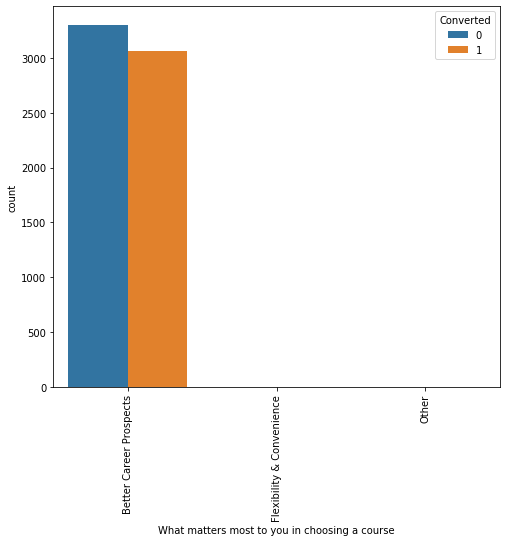

In [150]:

print(df['What matters most to you in choosing a course'].astype('category').value_counts())
fig, axs = plt.subplots(figsize = (8,7))
sns.countplot(x= 'What matters most to you in choosing a course', hue = "Converted", data = df)
xticks(rotation = 90)

Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

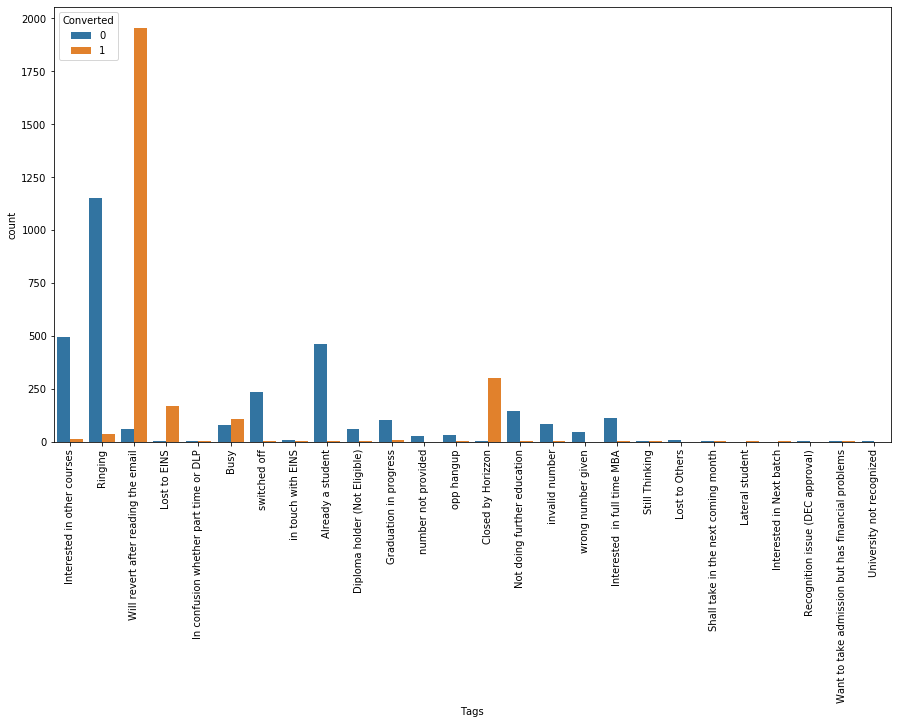

In [151]:
## Coloumn : Tags
print(df['Tags'].astype('category').value_counts())
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x= 'Tags', hue = "Converted", data = df)
xticks(rotation = 90)

<span style='color:blue'>Let's combine all  low occurence category to OthersTags   </span>

In [152]:
df['Tags'] = df['Tags'].replace(['Recognition issue (DEC approval)' , 'University not recognized',
                                 'Shall take in the next coming month' , 'Lateral student',
                                 'In confusion whether part time or DLP'   , 'Interested in Next batch',
                                 'number not provided' , 'opp hangup', 
                                 'Still Thinking'    , 'Want to take admission but has financial problems',
                                 'Lost to Others'    , 'in touch with EINS', 
                                 'wrong number given' , 'Diploma holder (Not Eligible)',
                                 'invalid number'], 'OtherTags')


In [153]:
df['Tags'] = df['Tags'].replace(np.nan, 'OtherTags')

OtherTags                              3627
Will revert after reading the email    2016
Ringing                                1187
Interested in other courses             509
Already a student                       465
Closed by Horizzon                      301
switched off                            240
Busy                                    185
Lost to EINS                            172
Not doing further education             145
Interested  in full time MBA            116
Graduation in progress                  111
Name: Tags, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

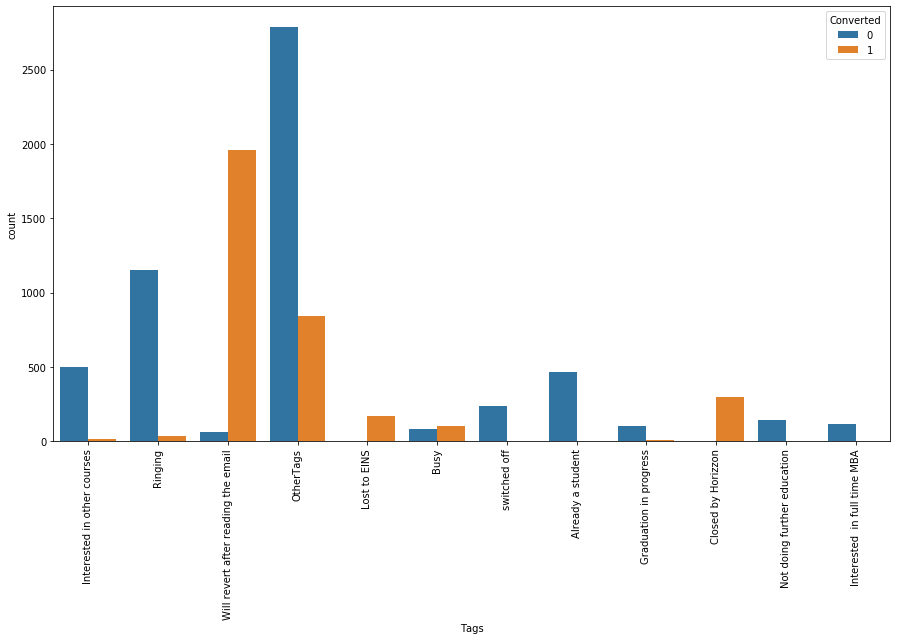

In [154]:
print(df['Tags'].astype('category').value_counts())
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x= 'Tags', hue = "Converted", data = df)
xticks(rotation = 90)

In [155]:
df = df.drop(columns =['What matters most to you in choosing a course'])
df.shape

(9074, 27)

In [156]:
round(df.isnull().sum()/(len(df))*100,2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [157]:
# Get the value counts of all the columns

for column in df:
    print(df[column].astype('category').value_counts())
    print('_____________XXXXXX__________________________')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
539366d9-f633-455a-99e4-dbc5907db28e    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aaaaf89c-20bc-4974-8d0d-e31f1dc4f562    1
aab11d65-90a3-4f8a-98ac-58cfa19475ba    1
aab516e2-9881-4f4f-901a-cde597f7f9e9    1
aab6143a-424d-4a19-993e-03065412c420    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9074, dtype: int64
_____________XXXXXX__________________________
660737    1
602411    1
602438    1
602435    1
602420    1
         ..
630128    1
630135    1
630139    1
630158    1
579533    1
Name: Lead Number, Length: 9074, dtype: int64
_____________XXXXXX__________________________
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
_____________XXXXXX__________________________
Google          

<div class="alert alert-block alert-success">
<b>Observation:</b>from above There were a few columns in which only one value was majorly present for all the data points.
    <br> These column names 
    <br> Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement,
    <br>Through Recommendations,Receive More Updates About Our Courses,
    <br>Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. 
    <br><b>it's best that we drop these columns as they will not help us as only one value is there.</b>
    
</div>

In [158]:
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [159]:
round(df.isnull().sum()/(len(df))*100,2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [160]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,OtherSpecialization,Unemployed,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,OtherSpecialization,Unemployed,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,OtherSpecialization,Unemployed,Will revert after reading the email,No,Modified


<span style ='color:blue' > We can drop Prospect ID and Lead Number as they are just a number <br>
    and We don't think they will required for analysis </span>

In [161]:
df.drop(['Prospect ID','Lead Number'],axis =1 ,inplace=True)

In [162]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,OtherSpecialization,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,OtherSpecialization,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened


<h2 style="color:Blue"> Dummy Variable Creation (one-Hot Encoding) </h2>

<span style ='color:blue' > For binary variables (yes/no) we'll convert to 0/1 </span>

In [163]:
category = df.select_dtypes(exclude=np.number).columns

In [164]:
binary_Category =[]
tertiary_category =[]
multi_category =[]

for i in category :
    Value_count =df[i].astype('category').value_counts()
    
    if (len(Value_count)==2) :
        binary_Category.append(i)
    elif (len(Value_count)==3)  :
        tertiary_category.append(i)
    elif (len(Value_count)>3) :
        multi_category.append(i)

In [165]:
binary_Category

['Do Not Email', 'A free copy of Mastering The Interview']

In [166]:
tertiary_category

[]

In [167]:
multi_category

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Last Notable Activity']

In [168]:
df[binary_Category].head()

,Do Not Email,A free copy of Mastering The Interview
0,No,No
1,No,No
2,No,Yes
3,No,No
4,No,No


In [169]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [170]:
df.shape

(9074, 13)

In [171]:
df[multi_category].head()

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,Tags,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,OtherSpecialization,Unemployed,Interested in other courses,Modified
1,API,Organic Search,Email Opened,OtherSpecialization,Unemployed,Ringing,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Will revert after reading the email,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Ringing,Modified
4,Landing Page Submission,Google,Converted to Lead,OtherSpecialization,Unemployed,Will revert after reading the email,Modified


<span style='color:blue'> for multiple category, <br>
Let's do one hot encoding i.e. Dummy varaibles <br>
   
</span>

In [172]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                                'Tags','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [173]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                                'Tags','Last Notable Activity'], 1)

In [174]:
df=df[sorted(df.columns)]

In [175]:
df.shape

(9074, 94)

<span style ='color:blue'> Boxplot to visualise the outliers </span>

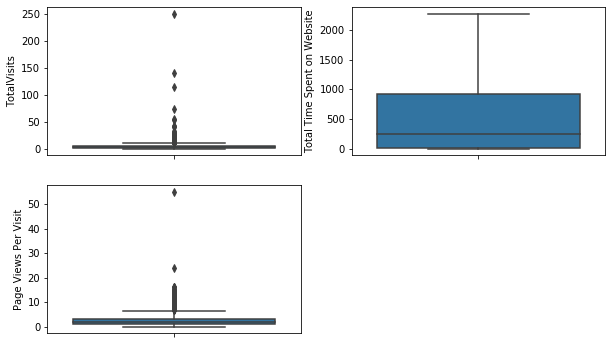

In [176]:
plt.figure(figsize=(10,6))
feature=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]],orient='v')

<span style ='color:blue'>As we can define from the above Boxplot, all the variable has outliers so we will cap the outliers as we do not want to loose any data </span>

In [177]:
# Outlier Capping of TotalVisits column
q1= df['TotalVisits'].quantile(0.01)
q2= df['TotalVisits'].quantile(0.99)
df['TotalVisits'][df['TotalVisits']<=q1]=q1
df['TotalVisits'][df['TotalVisits']>=q2]=q2

# Outlier Capping of 'Total Time Spent on Website  column
q3= df['Total Time Spent on Website'].quantile(0.01)
q4= df['Total Time Spent on Website'].quantile(0.99)
df['Total Time Spent on Website'][df['Total Time Spent on Website']<=q3]=q3
df['Total Time Spent on Website'][df['Total Time Spent on Website']>=q4]=q4

# Outlier Capping of "Page Views Per Visit" column
q5= df['Page Views Per Visit'].quantile(0.01)
q6= df['Page Views Per Visit'].quantile(0.99)
df['Page Views Per Visit'][df['Page Views Per Visit']<=q5]=q5
df['Page Views Per Visit'][df['Page Views Per Visit']>=q6]=q6


### Boxplot after Capping to 1% and 99% 

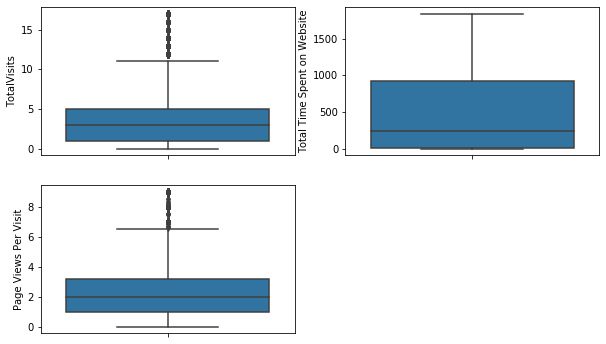

In [178]:
# Boxplot to visualise the outliers
plt.figure(figsize=(10,6))
feature=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]],orient='v')


<h2 style="color:Blue"> Splitting the Data into Training and Testing Sets </h2>

In [179]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)

In [180]:
# Putting response variable to y
y=df['Converted']

In [181]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

<h2 style='color:blue' >Rescaling the Features </h2>


<span style ='color:blue'>
Now there are a few numeric variables present in the dataset has different scales.
It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.So Standard Scaling is used to scale['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] these columns
</span>

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,A free copy of Mastering The Interview,Do Not Email,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,...,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Total Time Spent on Website,TotalVisits,What is your current occupation_Housewife,What is your current occupation_OtherOccupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,1,0,0,0,0,0,1,0,0,0,...,0,0,0,-0.159145,-0.417238,0,1,0,0,0
1012,0,1,0,1,0,0,0,0,0,0,...,0,0,0,-0.540914,-0.417238,0,0,0,0,1
9226,0,0,0,0,0,0,0,0,0,0,...,1,0,0,-0.891330,-1.034493,0,0,0,1,0
4750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.653796,-0.417238,0,1,0,0,0
7987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2.030032,0.508645,0,0,0,1,0


<span style ='color:blue'> We need to check Converted Rate to check how much data is imbalanced.</span>

In [183]:
### Checking the Converted Rate
conveterted_rate = round((sum(df['Converted'])/len(df['Converted'].index))*100,3)
print(conveterted_rate)

37.855


<h2 style= 'color:blue'>Feature Selection Using RFE</h2>

In [184]:
#Sorting the columns
X_train=X_train[sorted(X_train.columns)]
X_test= X_test[sorted(X_test.columns)]

In [185]:
X_test.head()

,A free copy of Mastering The Interview,Do Not Email,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,...,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Total Time Spent on Website,TotalVisits,What is your current occupation_Housewife,What is your current occupation_OtherOccupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3271,0,0,0,0,0,0,1,0,0,0,...,0,0,0,157,4.0,0,1,0,0,0
1490,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1513,5.0,0,0,0,0,1
7936,0,0,0,0,0,0,1,0,0,0,...,0,0,0,74,2.0,0,1,0,0,0
4216,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.0,0,0,1,0,0
3830,1,0,0,0,0,0,1,0,0,0,...,0,0,0,164,8.0,0,1,0,0,0


In [186]:
from sklearn.linear_model import LogisticRegression
np.random.seed(0)
logreg = LogisticRegression(random_state=100)

In [187]:
# running RFE with 15 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [188]:
# The list of columns which are selected
col = X_train.columns[rfe.support_]

In [189]:
col

Index(['Do Not Email', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_OtherTags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'What is your current occupation_OtherOccupation'],
      dtype='object')

<span style ='color:blue'> Assessing the model with StatsModels</span>

In [190]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm2.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1315.9
Date:                Mon, 20 Jul 2020   Deviance:                       2631.8
Time:                        16:31:58   Pearson chi2:                 1.11e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -3.1555      0.226    -13.962      0.000      -3.599      -2.713
Do Not Email                                       -1.5430      0.245     -6.291      0.000      -2.024      -1.062
Last Activity_SMS Sent                              2.0302      0.115     17.687      0.000       1.805       2.255
Last Notable Activity_Modified                     -1.5894      0.126    -12.635      0.000      -1.836      -1.343
Last Notable Activity_Olark Chat Conversation      -1.0246      0.391     -2.621      0.009      -1.791      -0.258
Lead Origin_Lead Add Form                          -0.0121      0.409     -0.030      0.976      -0.815       0.790
Lead Source_Olark Chat                              0.2022      0.128      1.580      0.114      -0.049       0.453
Lead Source_Welingak Website                        3.6634      0.842      4.350      0.000       2.013       5.314
Tags_Busy                                           2.3820      0.311      7.666      0.000       1.773       2.991
Tags_Closed by Horizzon                             8.8282      0.765     11.543      0.000       7.329      10.327
Tags_Lost to EINS                                   8.9496      0.782     11.448      0.000       7.417      10.482
Tags_OtherTags                                      2.7363      0.241     11.368      0.000       2.265       3.208
Tags_Ringing                                       -1.5706      0.328     -4.785      0.000      -2.214      -0.927
Tags_Will revert after reading the email            6.7807      0.285     23.765      0.000       6.222       7.340
Tags_switched off                                  -1.5665      0.565     -2.770      0.006      -2.675      -0.458
What is your current occupation_OtherOccupation    -1.5607      0.124    -12.627      0.000      -1.803      -1.318
===================================================================================================================
"""

#### Checking VIFs

In [191]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [192]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_OtherTags,4.12
14,What is your current occupation_OtherOccupation,3.54
1,Last Activity_SMS Sent,1.71
4,Lead Origin_Lead Add Form,1.62
2,Last Notable Activity_Modified,1.52
12,Tags_Will revert after reading the email,1.49
6,Lead Source_Welingak Website,1.41
5,Lead Source_Olark Chat,1.35
8,Tags_Closed by Horizzon,1.17
11,Tags_Ringing,1.14


In [193]:
# Getting the predicted values on the train set
y_train_pred = res1.predict(X_train_sm)
y_train_pred[:10]

3009    0.121330
1012    0.123231
9226    0.016574
4750    0.512563
7987    0.998044
1281    0.996514
2880    0.121330
4971    0.778437
7536    0.974048
1248    0.013582
dtype: float64

In [194]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12132982, 0.12323136, 0.01657443, 0.51256316, 0.99804394,
       0.9965135 , 0.12132982, 0.7784368 , 0.97404781, 0.01358171])

##### Creating a dataframe with the actual Converted and the predicted probabilities

In [195]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Converted_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Converted_ID
0,0,0.121330,3009
1,0,0.123231,1012
2,0,0.016574,9226
3,1,0.512563,4750
4,1,0.998044,7987


In [196]:
#### After RFE ... We have asked question on forum ...
#### Me and Case study partner are getting 2 different columns 
#### He is getting following column so 
#### here is a code to drop that column
#### Both of us have full run file without any error.

#### His RFE does not exists  column [Lead Origin_Lead Add Form ] and [Lead Source_Olark Chat] 
#### However Our Accuracy , and Confusion matrix are gettting same output.

#### col1 = col.drop('Lead Source_Organic Search', 1)

#### Submitted .pynb fle is of Python 3.7.6 and  3.7.3 different Python version

#### The per our view the main reason is the co-efficient and importance of those columns are same.

#### Dropping the Least Significant Variable 'Lead Origin_Lead Add Form'

In [197]:
col1 = col.drop('Lead Origin_Lead Add Form', 1)

####  Let's re-run the model using the selected variables

In [198]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm3.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1315.9
Date:                Mon, 20 Jul 2020   Deviance:                       2631.8
Time:                        16:32:00   Pearson chi2:                 1.11e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -3.1556      0.226    -13.964      0.000      -3.599      -2.713
Do Not Email                                       -1.5431      0.245     -6.291      0.000      -2.024      -1.062
Last Activity_SMS Sent                              2.0300      0.115     17.701      0.000       1.805       2.255
Last Notable Activity_Modified                     -1.5892      0.126    -12.648      0.000      -1.836      -1.343
Last Notable Activity_Olark Chat Conversation      -1.0245      0.391     -2.621      0.009      -1.791      -0.258
Lead Source_Olark Chat                              0.2023      0.128      1.581      0.114      -0.048       0.453
Lead Source_Welingak Website                        3.6515      0.741      4.928      0.000       2.199       5.104
Tags_Busy                                           2.3821      0.311      7.668      0.000       1.773       2.991
Tags_Closed by Horizzon                             8.8236      0.749     11.784      0.000       7.356      10.291
Tags_Lost to EINS                                   8.9492      0.782     11.450      0.000       7.417      10.481
Tags_OtherTags                                      2.7362      0.241     11.370      0.000       2.265       3.208
Tags_Ringing                                       -1.5708      0.328     -4.787      0.000      -2.214      -0.928
Tags_Will revert after reading the email            6.7797      0.283     23.958      0.000       6.225       7.334
Tags_switched off                                  -1.5663      0.565     -2.770      0.006      -2.675      -0.458
What is your current occupation_OtherOccupation    -1.5604      0.123    -12.654      0.000      -1.802      -1.319
===================================================================================================================
"""

#### Checking the VIF

In [199]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_OtherTags,4.12
13,What is your current occupation_OtherOccupation,3.53
1,Last Activity_SMS Sent,1.70
2,Last Notable Activity_Modified,1.52
11,Tags_Will revert after reading the email,1.40
4,Lead Source_Olark Chat,1.35
10,Tags_Ringing,1.14
0,Do Not Email,1.12
5,Lead Source_Welingak Website,1.10
3,Last Notable Activity_Olark Chat Conversation,1.07


In [200]:
# Getting the predicted values on the train set
y_train_pred = res2.predict(X_train_sm)
y_train_pred[:10]

3009    0.121330
1012    0.123194
9226    0.016571
4750    0.512527
7987    0.998043
1281    0.996509
2880    0.121330
4971    0.778423
7536    0.974018
1248    0.013578
dtype: float64

In [201]:
#Reshaped the y_train_pred array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12132967, 0.12319383, 0.01657142, 0.51252699, 0.99804287,
       0.99650894, 0.12132967, 0.77842293, 0.97401828, 0.01357786])

##### Creating a dataframe with the actual Converted and the predicted probabilities

In [202]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Converted_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Converted_ID
0,0,0.121330,3009
1,0,0.123194,1012
2,0,0.016571,9226
3,1,0.512527,4750
4,1,0.998043,7987


#### Dropping the Least Significant Variable 'Lead Source_Olark Chat'

In [203]:
col2 = col1.drop('Lead Source_Olark Chat', 1)

####  Let's re-run the model using the selected variables

In [204]:
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm3.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1317.1
Date:                Mon, 20 Jul 2020   Deviance:                       2634.3
Time:                        16:32:01   Pearson chi2:                 1.10e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -3.1166      0.224    -13.897      0.000      -3.556      -2.677
Do Not Email                                       -1.5587      0.244     -6.383      0.000      -2.037      -1.080
Last Activity_SMS Sent                              2.0071      0.113     17.709      0.000       1.785       2.229
Last Notable Activity_Modified                     -1.5818      0.126    -12.592      0.000      -1.828      -1.336
Last Notable Activity_Olark Chat Conversation      -0.9507      0.390     -2.438      0.015      -1.715      -0.186
Lead Source_Welingak Website                        3.5975      0.740      4.861      0.000       2.147       5.048
Tags_Busy                                           2.3686      0.310      7.635      0.000       1.761       2.977
Tags_Closed by Horizzon                             8.7934      0.748     11.749      0.000       7.326      10.260
Tags_Lost to EINS                                   8.9279      0.781     11.433      0.000       7.397      10.458
Tags_OtherTags                                      2.7604      0.240     11.500      0.000       2.290       3.231
Tags_Ringing                                       -1.5687      0.328     -4.784      0.000      -2.211      -0.926
Tags_Will revert after reading the email            6.7571      0.282     23.937      0.000       6.204       7.310
Tags_switched off                                  -1.5750      0.565     -2.786      0.005      -2.683      -0.467
What is your current occupation_OtherOccupation    -1.5661      0.123    -12.716      0.000      -1.807      -1.325
===================================================================================================================
"""

#### Checking the VIF

In [205]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_OtherTags,3.94
12,What is your current occupation_OtherOccupation,3.53
1,Last Activity_SMS Sent,1.70
2,Last Notable Activity_Modified,1.48
10,Tags_Will revert after reading the email,1.38
9,Tags_Ringing,1.13
0,Do Not Email,1.11
4,Lead Source_Welingak Website,1.10
6,Tags_Closed by Horizzon,1.06
5,Tags_Busy,1.05


Now as we can observe, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model.

In [206]:
# Getting the predicted values on the train set
y_train_pred = res2.predict(X_train_sm)
y_train_pred[:10]

3009    0.127602
1012    0.128426
9226    0.013926
4750    0.521187
7987    0.998047
1281    0.996486
2880    0.127602
4971    0.778867
7536    0.974430
1248    0.013926
dtype: float64

In [207]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12760243, 0.1284265 , 0.01392567, 0.52118666, 0.99804735,
       0.99648628, 0.12760243, 0.77886704, 0.97443009, 0.01392567])

##### Creating a dataframe with the actual Converted and the predicted probabilities

In [208]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Converted_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Converted_ID
0,0,0.127602,3009
1,0,0.128426,1012
2,0,0.013926,9226
3,1,0.521187,4750
4,1,0.998047,7987


### Plotting ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [209]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [210]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

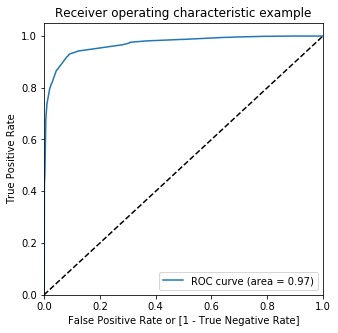

In [211]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### As we can observe the False Positive rate is very low, means the wrongly predicted convertion is very low.

###  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [212]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Converted_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.127602,3009,1,1,0,0,0,0,0,0,0,0
1,0,0.128426,1012,1,1,0,0,0,0,0,0,0,0
2,0,0.013926,9226,1,0,0,0,0,0,0,0,0,0
3,1,0.521187,4750,1,1,1,1,1,1,0,0,0,0
4,1,0.998047,7987,1,1,1,1,1,1,1,1,1,1


In [213]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','fals_pos_rate'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    fals_pos_rate= cm1[0,1]/ (cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,fals_pos_rate]
print(cutoff_df)

     prob  accuracy     sensi     speci  fals_pos_rate
0.0   0.0  0.385136  1.000000  0.000000       1.000000
0.1   0.1  0.801291  0.972608  0.693982       0.306018
0.2   0.2  0.917178  0.930090  0.909091       0.090909
0.3   0.3  0.917021  0.924775  0.912164       0.087836
0.4   0.4  0.918595  0.920278  0.917542       0.082458
0.5   0.5  0.920328  0.870401  0.951601       0.048399
0.6   0.6  0.912612  0.814800  0.973880       0.026120
0.7   0.7  0.912612  0.814391  0.974136       0.025864
0.8   0.8  0.909148  0.796402  0.979770       0.020230
0.9   0.9  0.873248  0.681521  0.993342       0.006658


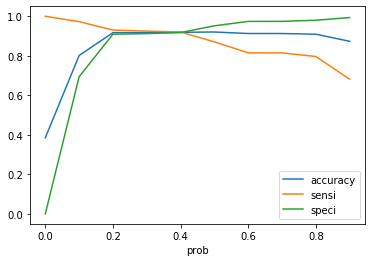

In [214]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, can be visualised that the intersection of acuracy,sensitivity and specificity curve is just ahead of .4 so we considered 0.45 is the optimum point as a cutoff probability.

# Anotherway to predict the cut-off

### Precision and recall tradeoff

In [215]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

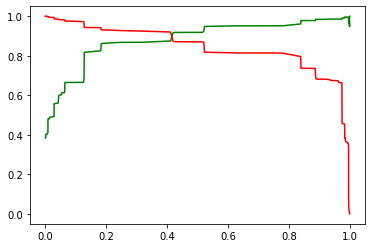

In [216]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### From the curve above, can be visualised that the intersection of precision & recall curve is just ahead of .4 so we considered 0.45 is the optimum point as a cutoff probability.

In [217]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > .45 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Converted_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.127602,3009,1,1,0,0,0,0,0,0,0,0,0
1,0,0.128426,1012,1,1,0,0,0,0,0,0,0,0,0
2,0,0.013926,9226,1,0,0,0,0,0,0,0,0,0,0
3,1,0.521187,4750,1,1,1,1,1,1,0,0,0,0,1
4,1,0.998047,7987,1,1,1,1,1,1,1,1,1,1,1


In [218]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9203275074791372

In [219]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3716,  189],
       [ 317, 2129]], dtype=int64)

In [220]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [221]:
# Let's see the sensitivity or Recall of our logistic regression model
TP / float(TP+FN)

0.8704006541291905

In [222]:
# Let us calculate specificity
TN / float(TN+FP)

0.9516005121638924

In [223]:
# Calculate false postive rate - (predicting converted when the customer have not converted)
print(FP/ float(TN+FP))

0.048399487836107556


In [224]:
# Positive predictive value or Precision 
print (TP / float(TP+FP))

0.9184641932700603


In [225]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9213984626828664


### Making predictions on the test set

In [226]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [227]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_OtherTags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,What is your current occupation_OtherOccupation
3271,0,0,0,0,0,0,0,0,1,0,0,0,1
1490,0,0,0,0,0,0,0,0,0,0,1,0,0
7936,0,0,0,0,0,0,0,0,1,0,0,0,1
4216,0,0,1,0,0,0,1,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,0,0,1


In [228]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [229]:
y_test_pred = res2.predict(X_test_sm)

In [230]:
y_test_pred[:10]

3271    0.127602
1490    0.974430
7936    0.127602
4216    0.983617
3830    0.127602
1800    0.974430
6507    0.064271
4821    0.009088
4223    0.996486
4714    0.182875
dtype: float64

In [231]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [232]:
# Let's see the head
y_pred_1.head()

,0
3271,0.127602
1490,0.974430
7936,0.127602
4216,0.983617
3830,0.127602


In [233]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [234]:
# Putting CustID to index
y_test_df['ConvertedID'] = y_test_df.index

In [235]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [236]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [237]:
y_pred_final.head()

,Converted,ConvertedID,0
0,0,3271,0.127602
1,1,1490,0.974430
2,0,7936,0.127602
3,1,4216,0.983617
4,0,3830,0.127602


In [238]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,ConvertedID,Converted_Prob
0,0,3271,0.127602
1,1,1490,0.974430
2,0,7936,0.127602
3,1,4216,0.983617
4,0,3830,0.127602


In [239]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ConvertedID','Converted','Converted_Prob'], axis=1)

In [240]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ConvertedID,Converted,Converted_Prob
0,3271,0,0.127602
1,1490,1,0.974430
2,7936,0,0.127602
3,4216,1,0.983617
4,3830,0,0.127602


In [241]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [242]:
y_pred_final.head()

,ConvertedID,Converted,Converted_Prob,final_predicted
0,3271,0,0.127602,0
1,1490,1,0.974430,1
2,7936,0,0.127602,0
3,4216,1,0.983617,1
4,3830,0,0.127602,0


In [243]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9140653690782226

In [244]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1639,   95],
       [ 139,  850]], dtype=int64)

In [245]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [246]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8594539939332659

In [247]:
# Let us calculate specificity
TN / float(TN+FP)

0.9452133794694348

In [248]:
# Calculate false postive rate - (predicting converted when the customer have not converted)
print(FP/ float(TN+FP))

0.05478662053056517


In [249]:
# Success of predicting the The positive convertion rate
# Positive predictive value or Precision 
print(TP / float(TP+FP))

0.8994708994708994


In [250]:
## Success of predicting the The negative convertion rate
# Negative predictive value
print(TN / float(TN+ FN))

0.921822272215973


<div class="alert alert-block alert-info">
<b>Conclusion:</b> </div>


 <table>
<thead>
    <tr>
        <th>Factos</th>
        <th>Train Data Set</th>
        <th>Test Data Set</th>
    </tr>
</thead>
<tbody>
    <tr>
        <td>Accuracy Score </td>
        <td>92.03%</td>
        <td>91.41%</td>
    </tr>
    <tr>
        <td>Sensitivity</td>
        <td>87.04%</td>
        <td>85.95%</td>
    </tr>
    <tr>
        <td>Specificity</td>
        <td>95.17%%</td>
        <td>94.52%</td>
    </tr>
    
  </tbody>
</table>


<div class="alert alert-block alert-warning"> 
    We can see that our model has accuracy up to <b>92%</b>  on train data set and <b>91% </b> on test data set.
<br>Column final_predicted , converted ,converted_prob used with used cut off 0.42 as lead score for identifying  hot leads and cold leads. Any probability below 0.42 considered as lower chance of getting converted ( cold lead) . Any probability above <b>0.42</b> considered as higher chance of getting converted ( hot lead) .


</div>